$f(x) =x $, $x\in (-\pi,\pi)$ を例に， $S_n(x)$ をプロットするプログラムを書いていきましょう．

In [1]:
using Plots
# using QuadGK # 以下で，quadgk（数値積分）を使うならばこのパッケージが必要

まず，$f(x)$を表す関数を定義します．

In [2]:
function func_original(x)
    return x
end

func_original (generic function with 1 method)

次に，$S_n(x)$を表す関数を定義します．

In [3]:
function S(n,a0,a,b,x)
#     入力
#         n: n項目までの部分和
#         a_0: Fourier級数のa0（スカラー）
#         a,b: a=[a1,...,an], b=[b1,...,bn]（ただし，a[1],...,a[n],b[1],...,b[n]にアクセスできればよいので，実際に入力する配列のサイズはn以上であればOK; 別の言い方をすれば，nはaやbのサイズ以下にする）
#         x: (-pi,pi)を分割した配列
#     出力
#         s: xと同じサイズの配列；s[l]はx[l]における部分和の値
    
    s = zeros(length(x),1)
    for l = 1: length(x)
        s[l] = a0/2;
        for k = 1:n
            s[l] +=  a[k]*cos(k*x[l]) + b[k]*sin(k*x[l])
        end
    end
    return s
end

S (generic function with 1 method)

In [4]:
n = 100; # この値は適当に変えて試してみてください．
a0 = 0; 
a = zeros(n,1);　# a_k用の配列
b = zeros(n,1); # b_k用の配列

$f(x)$ は奇関数ですから$a_k=0$であり，$b_k$のみ考えます．定義に従って計算すれば<br>
$\quad \displaystyle b_k = \frac{1}{\pi} \int_{-\pi}^\pi x \sin(kx) \, \mathrm d x  = \frac{2(-1)^{k+1}}{k}$ <br>
となります．<br>
このように直接計算できるときは，その結果を使うのがよいでしょう．もちろん，前回の内容を応用して数値積分することもできますが，領域を非常に細かく分割する必要があります．もっとも，もっとよい数値積分手法もあり，以下のfor文のコメントの部分はQuadGKというパッケージを使う場合の例になっています．<br>
https://github.com/JuliaMath/QuadGK.jl

In [5]:
for k = 1:n
    b[k] = 2*(-1)^(k+1)/k;
#     b[k], tmp = quadgk(x -> 1/pi * func_original(x) * sin(k*x), -pi, pi, rtol=1e-10)  # rtol　で数値積分の精度を設定
end

プロット用の変数を準備してプロットします．<br>
とりあえず，サンプルプログラムでは$n=1,2,10,50,100$のときをプロットしてみましたが，値を変えたり，あるいはプロットの数を増やしたりしていろいろ試してみてください．

In [6]:
x = -pi:pi/100:pi;

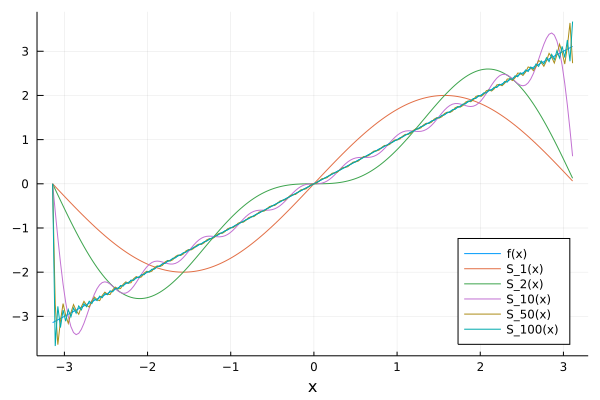

In [7]:
plot(x,func_original.(x),label="f(x)",legend=:bottomright)
plot!(x,S(1,a0,a,b,x),label="S_1(x)")
plot!(x,S(2,a0,a,b,x),label="S_2(x)")
plot!(x,S(10,a0,a,b,x),label="S_10(x)")
plot!(x,S(50,a0,a,b,x),label="S_50(x)")
plot!(x,S(100,a0,a,b,x),label="S_100(x)") 
xlabel!("x")

$n$を大きくすると$y=x$に近づいているような結果になりました．ただし，$x=-\pi,\pi$の付近では目で見てわかるくらいには振動が観察されます．